In [137]:
import numpy as np
from textwrap import wrap
import pylab as plt
from tqdm.notebook import tqdm

In [42]:
longpi = str(np.loadtxt("data/pi_100000digits.txt",dtype='str')).replace('.',"")
ntot = len(longpi)

In [43]:
digits = np.array(wrap(longpi,1),dtype='int')

(array([0.1111    , 0.11263333, 0.11008889, 0.1114    , 0.11078889,
        0.1114    , 0.11142222, 0.11138889, 0.11086667, 0.11002222]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

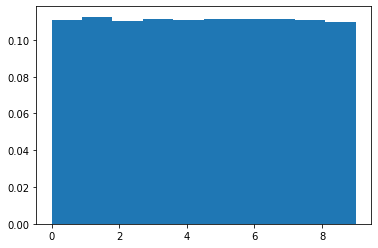

In [44]:
plt.hist(digits,bins=10,density=True)

(0.105, 0.115)

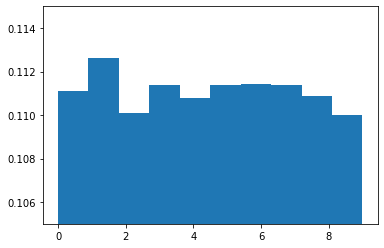

In [45]:
plt.hist(digits,bins=10,density=True)
plt.ylim(0.105,0.115)

In [77]:
def ranfrompi(nd,ntot):
    '''random number in [-1,1] from pi, nd is the number of digits'''
    return  -1+2*np.array(np.char.add("0.",wrap(longpi,nd)[:ntot//nd]),dtype=float)

(-1.0, 1.0)

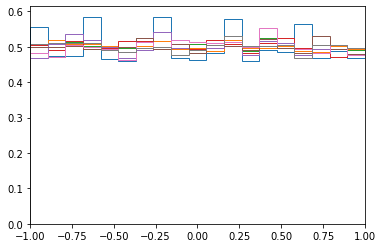

In [93]:
for nd in np.arange(2,10): 

    plt.hist(ranfrompi(nd,ntot),density=True,histtype='step',bins=np.linspace(-1,1,20))
plt.xlim(-1,1)


In [138]:
def findpi(nd):
    
    samples = ranfrompi(nd,ntot)
    if len(samples)%2:
        samples=samples[:-1]
    
    samples =samples.reshape((2,len(samples)//2))

    dist = np.sum(samples**2,axis=0)
    goodones = samples.T[dist<1].T
    return 4* goodones.shape[1]/samples.shape[1]

In [139]:
findpi(3)

3.1510860434417376

In [149]:
Ndigits=np.arange(1,5000)

In [ ]:
manypis = np.array([findpi(nd) for nd in tqdm(Ndigits)])
diffs = np.abs(manypis-np.pi)

In [ ]:
plt.plot(Ndigits,diffs)
plt.loglog()

In [122]:
if 1:
    print(1)

1
